# MicroMass data filtering

For the original source of this data, see https://doi.org/10.24432/C5T61S

This example dataset comes from the MicroMass dataset published at UCI Machine Learning Repositiory. <br> The data used here is the Mass Spectrometry data (MALDI-TOF) of a reference panel of 20 Gram positive and negative bacterial species. The samples are clustered per species, with each instance of a species as a replicate. 

## Loading the OmicsAnalysis class and data

We start by importing the OmicsAnalysis class. For the different import options and more info on this class, see omics_data_filtering_manual.ipynb in the manuals folder.

In [1]:
import numpy as np

import sys
sys.path.append('../../src/PhenoFeatureFinder/')

from omics_analysis import OmicsAnalysis

Now load the dataset as object of this class. Here, we call it 'masses'.

In [2]:
masses = OmicsAnalysis(
    metabolome_csv="./feature_data_unfiltered.csv",
    metabolome_feature_id_col="feature_id")

masses.validate_input_metabolome_df()

print("Number of total features before filtering = {0}".format(masses.metabolome.shape[0]))

Metabolome input data validated.
Number of total features before filtering = 1300


The number of features in this data is 1300. To get an idea of the structure of the data, we can make density plots for all the species:

<Figure size 640x480 with 0 Axes>

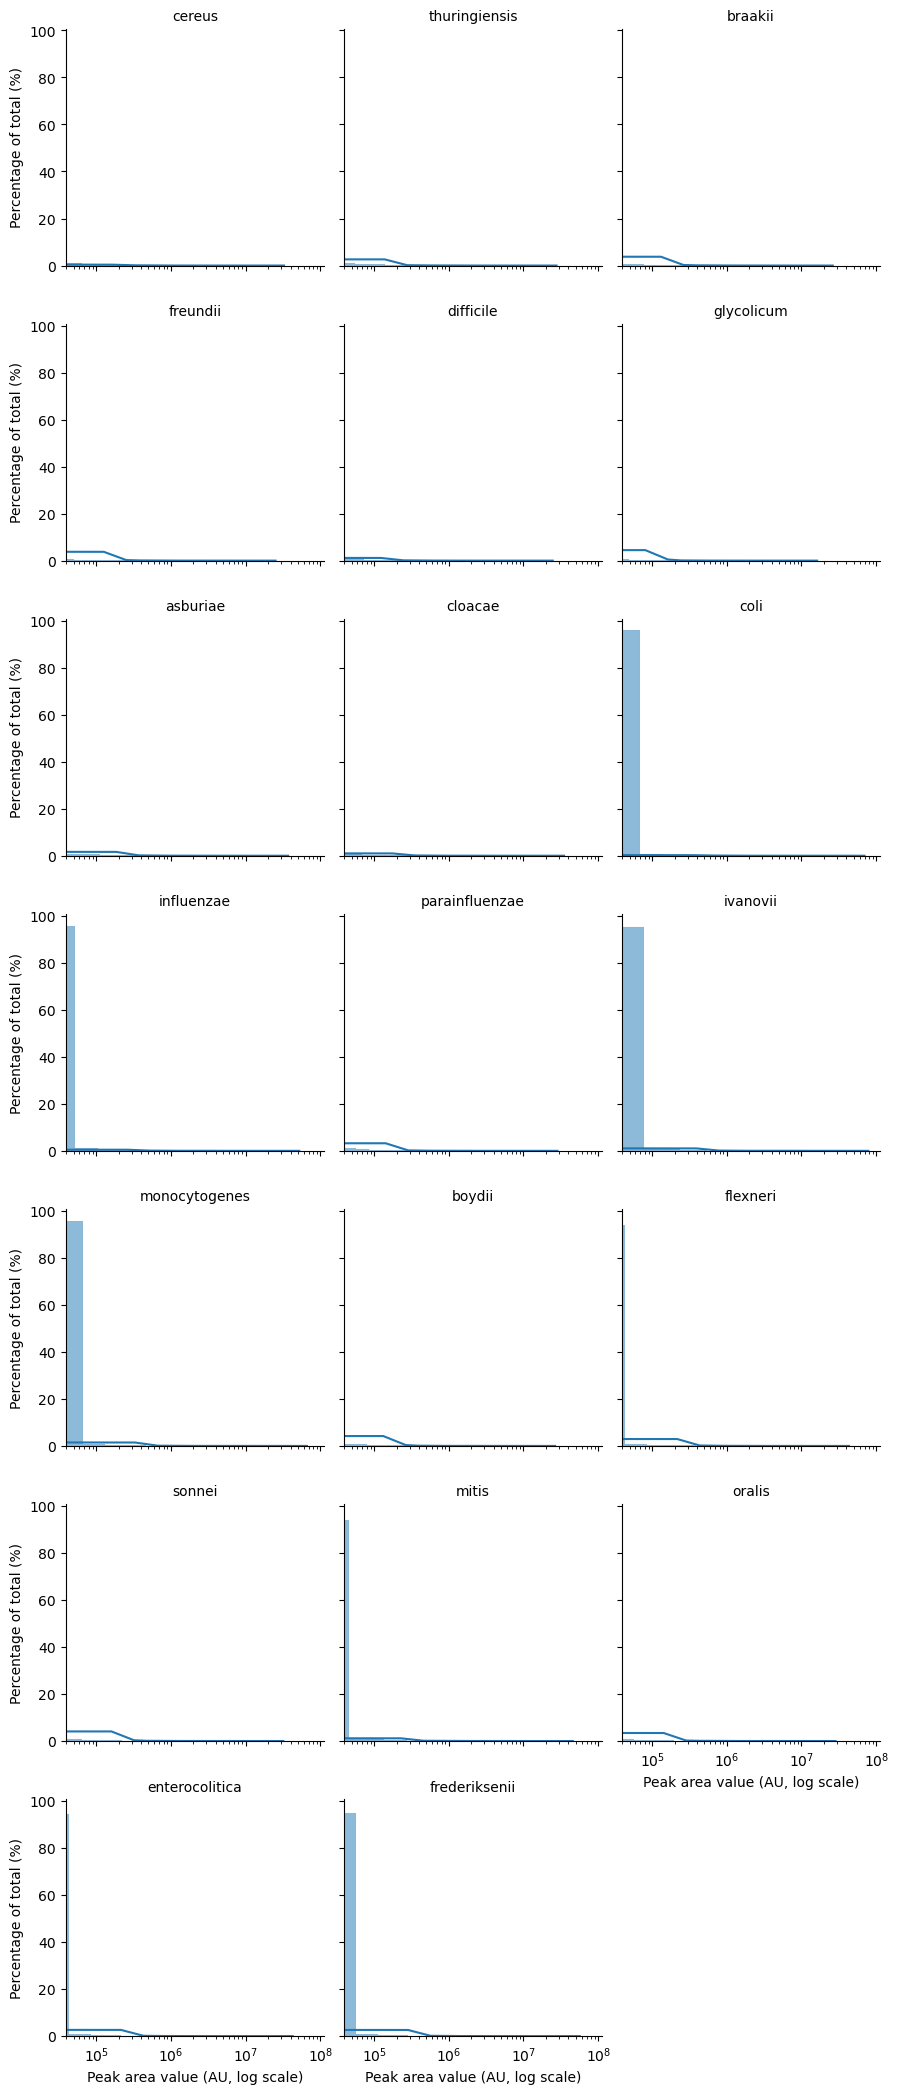

In [3]:
masses.create_density_plot()

 The density plots have the peak area (the value of the features) on the x-axis and the percentage of peaks wih these peak areas on the y-axis. <br> If we take a look at the density plots for this data, we can see that many of them have a bar reaching over 90% at the low peak area values. This means that over 90% of features in these samples have a very low peak area, or in other words, over 90% of features in these species have a very low abundance.
 

 ## Filtering

 To reduce the sparsity and get a more balanced dataset, the data needs to be filtered. Because there are no blank samples in this dataset, it is not possible to filter based on blanks. Instead, the first step is to filter out the unreliable features. Ideally, we would set nb_times_detected to the number of replicates, so that a feature has to be present in all replicates of at least one group. Because of the large differences in sample sizes, however, we'll have to decide which number we want to use. The smallest number of replicates is 11 (the sample size of *Bacillus thuringiensis*), which we'll use here as the input.
 

In [4]:
masses.filter_out_unreliable_features(nb_times_detected=11)
print("number of total features after unreliable feature filtering = {0}".format(masses.metabolome.shape[0]))

number of total features after unreliable feature filtering = 599


This filtering step has reduced the number of features to 599. Because the sample sizes are so different, there are likely still some unreliable features left (for example, if a feature is present in only 11 of the 60 replicates of *Escherichia coli*). As solution, we can also remove the features with an abundance under a given threshold. In this case we set the percentile to 97, meaning we only keep features that are in the 3% most abundant features of at least one species.

In [5]:
masses.filter_features_per_group_by_percentile(percentile=97)
print("number of total features after percentile filtering = {0}".format(masses.metabolome.shape[0]))

number of total features after percentile filtering = 581


The resulting dataset has 581 features.

To save this dataset as 'filtered_features.csv', we can run:

In [6]:
masses.write_clean_metabolome_to_csv(path_of_cleaned_csv="./filtered_features.csv")

## Data visualisation

To visualise the filtered data, we can perform and plot a Principle Component Analysis:

In [7]:
masses.compute_pca_on_metabolites(n_principal_components=10)
masses.pca_performed

True

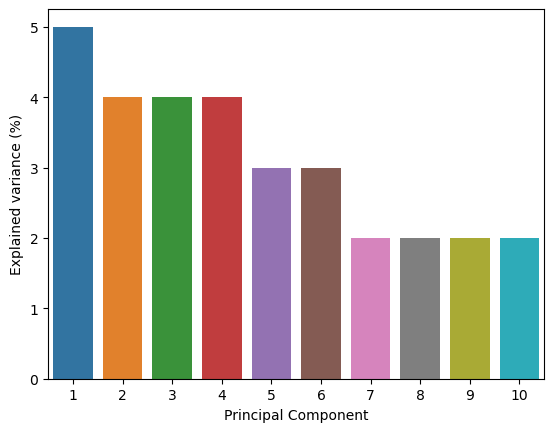

In [8]:
masses.create_scree_plot()

In [9]:
masses.metabolome_pca_reduced.shape

(571, 10)

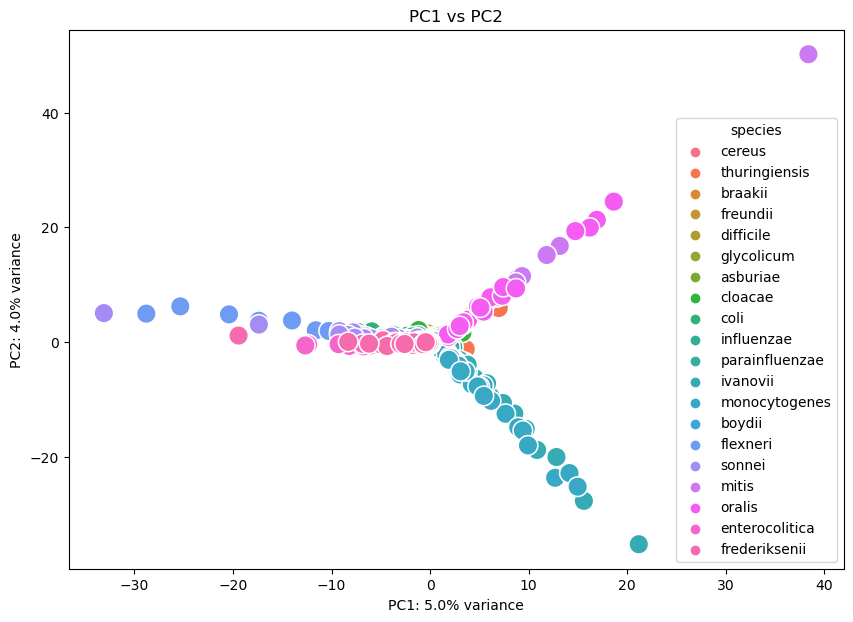

In [10]:
masses.create_sample_score_plot(
    pc_x_axis=1,
    pc_y_axis=2,
    name_grouping_var='species')

Or make an UpSet plot:

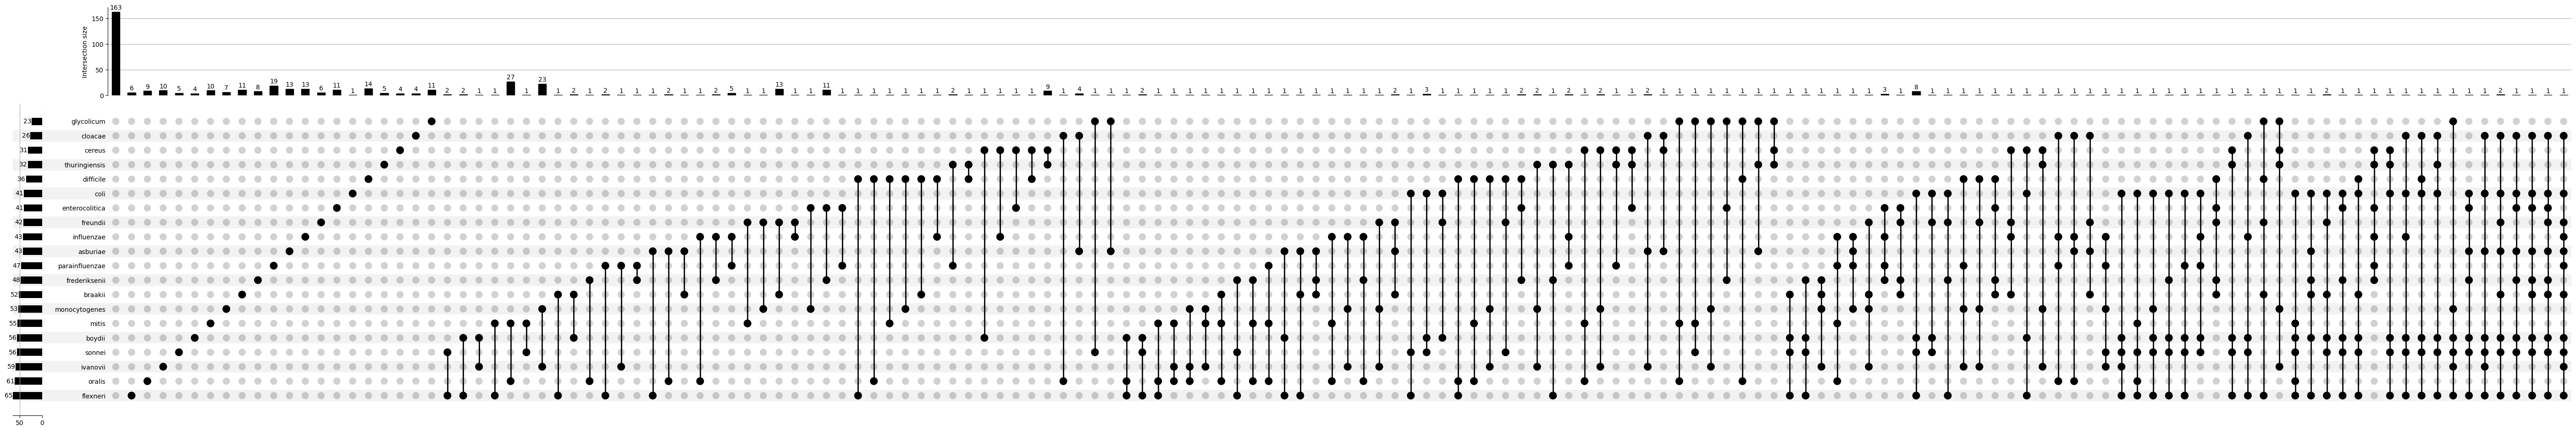

In [11]:
masses.plot_features_in_upset_plot()